In [1]:
import os
import sys
import shutil
import numpy as np
import pandas as pd
import pydicom as dicom
import matplotlib.pylab as plt
import SimpleITK as sitk
from datetime import datetime


In [2]:
%env SITK_SHOW_COMMAND r"C:\Users\NickosKal\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Slicer 5.4.0"
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
dicom.config.convert_wrong_length_to_UN = True

env: SITK_SHOW_COMMAND=r"C:\Users\NickosKal\AppData\Roaming\Microsoft\Windows\Start Menu\Programs\Slicer 5.4.0"


In [21]:
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

In [ ]:
from ..Utils import utils

In [4]:
config = utils.read_config()
config

{'common': {'paths': {'source_path_wd': 'E:/U-CAN-Lymfom_A',
   'source_path_bd': 'F:/ucan_lymfom'}},
 'selection': {'filenames': {'rejected_folder_filename': 'Rejected_exams_from_U-CAN-Lymfom.xlsx',
   'sourcefiltered_folder_filename': 'SourceFiltered_exams_from_U-CAN-Lymfom.xlsx',
   'incomplete_folders_filename_initial': 'No_PTorCT_exams_from_U-CAN-Lymfom1.xlsx',
   'incomplete_folders_filename_final': 'No_PTorCT_exams_from_U-CAN-Lymfom2.xlsx',
   'selected_folders_beforefiltering_filename': 'Selected_exams_beforefiltering_from_U-CAN-Lymfom.xlsx',
   'selected_folders_afterfiltering_filename': 'Selected_exams_afterfiltering_from_U-CAN-Lymfom.xlsx',
   'final_selected_images_filename': 'FinalSelected_exams_from_U-CAN-Lymfom.xlsx',
   'list_of_distorted_images_filename': 'Distorted_exams_from_U-CAN-Lymfom.xlsx'}},
 'metadata': {'filenames': {'final_selected_images_filename': 'Finalized_dataset.xlsx'}},
 'resampling': {'voxel_spacing': [2, 2, 3], 'image_size': [256, 256, 256]},
 'proje

In [5]:
#source_path_wd = "/media/andres/T7 Shield1/U-CAN-Lymfom_A/Selected_for_UCAN_project"
#source_path_bd = "/media/andres/T7 Shield/ucan_lymfom"

source_path_wd = config['common']['paths']['source_path_wd']
source_path_bd = config['common']['paths']['source_path_bd']

master_data_wd_filename = config['metadata']['filenames']['final_selected_images_filename']
master_data_bd_filename = config['metadata']['filenames']['final_selected_images_filename']


In [6]:
final_selected_images_filename = config['selection']['filenames']['final_selected_images_filename']
final_selected_folders_bd = source_path_bd + '/' + final_selected_images_filename

In [7]:
# master_data for black disk
print("Reading master data for black disk")
master_data_bd = pd.read_excel(os.path.join(source_path_bd, master_data_wd_filename))
#master_data_wd[['system', 'npr', 'scan_date']]= master_data_wd['patient_directory'].str.split(pat='_|-', n=2, expand=True)
print(master_data_bd.shape)

master_data_bd.head(2)

Reading master data for black disk


FileNotFoundError: [Errno 2] No such file or directory: 'F:/ucan_lymfom\\Finalized_dataset.xlsx'

In [8]:
# master data from white disk
print("Readin master data from white disk")
master_data_wd = pd.read_excel(os.path.join(source_path_bd, master_data_wd_filename))
master_data_wd[['system', 'npr', 'scan_date']]= master_data_wd['patient_directory'].str.split(pat='_|-', n=2, expand=True)
print(master_data_wd.shape)

master_data_wd.head(2)

Readin master data from white disk
(2264, 45)


,Unnamed: 0,Unnamed: 0_x,directory,source_directory,patient_directory,PET-CT_info,system,npr,scan_date,Unnamed: 0_y,dicom_img,patient_id,patient_age,patient_weight,patient_size,imgsz_x,imgsz_y,num_slices,voxsz_x,voxsz_y,slice_thickness,image_size,voxel_size,img_pos,img_orient,for_uid,att_corr,recons_method,image_type,aquisition_dt,aquisition_time,study_desc,series_desc,protocol,corr_img,modality,manufacturer,manufacturer_model,radiopharmaceutical,radiopharmaceutical_volume,radiopharmaceutical_start_time,radionuclide_total_dose,radionuclide_half_life,radionuclide_positron_fraction,radiopharmaceutical_start_date_time
0,0,2096,F:/ucan_lymfom/ASPTCTX0001_lpr385705046400-20140313/CT-20140313-152551-6.1_UAS-WB-FDG-3D-STANDARD_CT_RECON-3.750000mm,F:/ucan_lymfom,ASPTCTX0001_lpr385705046400-20140313,CT-20140313-152551-6.1_UAS-WB-FDG-3D-STANDARD_CT_RECON-3.750000mm,ASPTCTX0001,lpr385705046400,20140313,13743,1.2.840.113619.2.55.3.4240671514.332.1394175950.81.1,lpr385705046400,33.0,'69.0','1.73',512,512,215,0.976562,0.976562,3.75,"(512, 512, 215)","(0.976562, 0.976562, 3.75)","[-250.000, -250.000, 167.080]","[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]",1.2.840.113619.2.55.3.4240671514.332.1394175949.830.13830.1,NaN,NaN,"['ORIGINAL', 'PRIMARY', 'AXIAL']",'20140313','152608','FDG WB 1 h','STANDARD CT RECON','6.1 UAS-WB-FDG-3D',NaN,CT,'GE MEDICAL SYSTEMS','Discovery STE',NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2095,F:/ucan_lymfom/ASPTCTX0001_lpr385705046400-20140313/PT-20140313-152728-UAS-WB-FDG-3D-UAS-WB-FDG-3D-AC-3.2700mm,F:/ucan_lymfom,ASPTCTX0001_lpr385705046400-20140313,PT-20140313-152728-UAS-WB-FDG-3D-UAS-WB-FDG-3D-AC-3.2700mm,ASPTCTX0001,lpr385705046400,20140313,13745,1.2.840.113619.2.131.4240671514.1394722651.463822,lpr385705046400,33.0,'69.0','1.73',128,128,247,3.906250,3.906250,3.27,"(128, 128, 247)","(3.90625, 3.90625, 3.27)","[-248.04687500000, -248.04687500000, 169.020004272460]","[1, 0, 0, 0, 1, -0]",1.2.840.113619.2.55.3.4240671514.332.1394175949.830.13830.1,"'measured,, 0.096000 cm-1,'",'3D IR',"['ORIGINAL', 'PRIMARY']",'20140313','154238','FDG WB 1 h','UAS-WB-FDG-3D-AC','UAS-WB-FDG-3D',"['DECY', 'ATTN', 'SCAT', 'DTIM', 'RAN', 'DCAL', 'SLSENS', 'NORM']",PT,'GE MEDICAL SYSTEMS','Discovery STE','FDG -- fluorodeoxyglucose','0.0','141400.00','259344912.0','6588.0','0.97000002861023','20140313141400.00'


In [9]:
#(2264 / 25) * 2 -> 181.12 Gb

In [10]:
misclassified_df = pd.read_excel(source_path_bd + '/MisclassifiedSelected_files.xlsx')
misclassified_df[['source_directory', 'patient_directory', 'PET-CT_info']] = misclassified_df['directory'].str.rsplit(pat='/', n=2, expand=True)
misclassified_patient_directory_list = misclassified_df.patient_directory.to_list()
misclassified_df.head()

,Unnamed: 0,directory,count,source_directory,patient_directory,PET-CT_info
0,284,F:/ucan_lymfom/ASPTCTX0001_npr196644347217-20161125/CT-20161125-114603-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.958984mm,1,F:/ucan_lymfom,ASPTCTX0001_npr196644347217-20161125,CT-20161125-114603-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.958984mm
1,750,F:/ucan_lymfom/ASPTCTX0001_npr338511978351-20170201/CT-20170201-122546-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.953125mm,1,F:/ucan_lymfom,ASPTCTX0001_npr338511978351-20170201,CT-20170201-122546-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.953125mm
2,1398,F:/ucan_lymfom/ASPTCTX0001_npr567278394863-20151103/CT-20151103-130218-6.3_UAS-WB-FDG-3D_CT_THORAX-BUK_VENFAS_20141209-HELKROPP_VENFAS_AX_1MM-0.976562mm,1,F:/ucan_lymfom,ASPTCTX0001_npr567278394863-20151103,CT-20151103-130218-6.3_UAS-WB-FDG-3D_CT_THORAX-BUK_VENFAS_20141209-HELKROPP_VENFAS_AX_1MM-0.976562mm
3,1412,F:/ucan_lymfom/ASPTCTX0001_npr574436824692-20170222/CT-20170222-104855-6.6_UAS-WB-FDG-3D_VENFASTHORAX_INSP_20160120-WB_VEN_AX-0.951172mm,1,F:/ucan_lymfom,ASPTCTX0001_npr574436824692-20170222,CT-20170222-104855-6.6_UAS-WB-FDG-3D_VENFASTHORAX_INSP_20160120-WB_VEN_AX-0.951172mm
4,1682,F:/ucan_lymfom/ASPTCTX0001_npr676639996732-20180928/CT-20180928-150052-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.976562mm,1,F:/ucan_lymfom,ASPTCTX0001_npr676639996732-20180928,CT-20180928-150052-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.976562mm


In [11]:
master_data_bd[np.logical_and(master_data_bd.num_slices >200,master_data_bd.num_slices < 250)].head(2) # 488

,Unnamed: 0,Unnamed: 0_x,directory,source_directory,patient_directory,PET-CT_info,system,npr,scan_date,Unnamed: 0_y,dicom_img,patient_id,patient_age,patient_weight,patient_size,imgsz_x,imgsz_y,num_slices,voxsz_x,voxsz_y,slice_thickness,image_size,voxel_size,img_pos,img_orient,for_uid,att_corr,recons_method,image_type,aquisition_dt,aquisition_time,study_desc,series_desc,protocol,corr_img,modality,manufacturer,manufacturer_model,radiopharmaceutical,radiopharmaceutical_volume,radiopharmaceutical_start_time,radionuclide_total_dose,radionuclide_half_life,radionuclide_positron_fraction,radiopharmaceutical_start_date_time
0,0,2096,F:/ucan_lymfom/ASPTCTX0001_lpr385705046400-20140313/CT-20140313-152551-6.1_UAS-WB-FDG-3D-STANDARD_CT_RECON-3.750000mm,F:/ucan_lymfom,ASPTCTX0001_lpr385705046400-20140313,CT-20140313-152551-6.1_UAS-WB-FDG-3D-STANDARD_CT_RECON-3.750000mm,ASPTCTX0001,lpr385705046400,20140313,13743,1.2.840.113619.2.55.3.4240671514.332.1394175950.81.1,lpr385705046400,33.0,'69.0','1.73',512,512,215,0.976562,0.976562,3.75,"(512, 512, 215)","(0.976562, 0.976562, 3.75)","[-250.000, -250.000, 167.080]","[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]",1.2.840.113619.2.55.3.4240671514.332.1394175949.830.13830.1,NaN,NaN,"['ORIGINAL', 'PRIMARY', 'AXIAL']",'20140313','152608','FDG WB 1 h','STANDARD CT RECON','6.1 UAS-WB-FDG-3D',NaN,CT,'GE MEDICAL SYSTEMS','Discovery STE',NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2095,F:/ucan_lymfom/ASPTCTX0001_lpr385705046400-20140313/PT-20140313-152728-UAS-WB-FDG-3D-UAS-WB-FDG-3D-AC-3.2700mm,F:/ucan_lymfom,ASPTCTX0001_lpr385705046400-20140313,PT-20140313-152728-UAS-WB-FDG-3D-UAS-WB-FDG-3D-AC-3.2700mm,ASPTCTX0001,lpr385705046400,20140313,13745,1.2.840.113619.2.131.4240671514.1394722651.463822,lpr385705046400,33.0,'69.0','1.73',128,128,247,3.906250,3.906250,3.27,"(128, 128, 247)","(3.90625, 3.90625, 3.27)","[-248.04687500000, -248.04687500000, 169.020004272460]","[1, 0, 0, 0, 1, -0]",1.2.840.113619.2.55.3.4240671514.332.1394175949.830.13830.1,"'measured,, 0.096000 cm-1,'",'3D IR',"['ORIGINAL', 'PRIMARY']",'20140313','154238','FDG WB 1 h','UAS-WB-FDG-3D-AC','UAS-WB-FDG-3D',"['DECY', 'ATTN', 'SCAT', 'DTIM', 'RAN', 'DCAL', 'SLSENS', 'NORM']",PT,'GE MEDICAL SYSTEMS','Discovery STE','FDG -- fluorodeoxyglucose','0.0','141400.00','259344912.0','6588.0','0.97000002861023','20140313141400.00'


In [12]:
exams_with_lt250 = master_data_wd[master_data_wd.num_slices < 250].patient_directory.to_list()
len(exams_with_lt250)

499

In [13]:
master_data_wd_filtered = master_data_wd[~master_data_wd.patient_directory.isin(exams_with_lt250)].copy().reset_index()
master_data_wd_filtered.shape

(1562, 46)

In [14]:
master_data_wd_filtered.patient_directory.nunique()

781

In [9]:
config_size = config['resampling']['image_size']
config_spacing = config['resampling']['voxel_spacing']
print('config_size: ', config_size)
print('config_spacing: ', config_spacing)

config_size:  [256, 256, 256]
config_spacing:  [2, 2, 3]


In [16]:
sample_SUV_image = sitk.ReadImage('F:/SUV.nii.gz')
print(sample_SUV_image.GetSize())
config_spacing = list(sample_SUV_image.GetSpacing())
config_spacing

(400, 400, 326)


[2.0364201068878174, 2.0364201068878174, 3.0]

In [17]:
#clip positive values at +3000
#set outside image 0 values to -1024

In [18]:
master_data_wd_filtered.head(2)
master_data_wd_filtered_sorted = master_data_wd_filtered.sort_values(by=["patient_directory"	,"PET-CT_info"], ascending=[True, False])
master_data_wd_filtered_sorted.head(5)

,index,Unnamed: 0,Unnamed: 0_x,directory,source_directory,patient_directory,PET-CT_info,system,npr,scan_date,Unnamed: 0_y,dicom_img,patient_id,patient_age,patient_weight,patient_size,imgsz_x,imgsz_y,num_slices,voxsz_x,voxsz_y,slice_thickness,image_size,voxel_size,img_pos,img_orient,for_uid,att_corr,recons_method,image_type,aquisition_dt,aquisition_time,study_desc,series_desc,protocol,corr_img,modality,manufacturer,manufacturer_model,radiopharmaceutical,radiopharmaceutical_volume,radiopharmaceutical_start_time,radionuclide_total_dose,radionuclide_half_life,radionuclide_positron_fraction,radiopharmaceutical_start_date_time
1,3,3,947,F:/ucan_lymfom/ASPTCTX0001_lpr415675513429-20190201/PT-20190201-101500-3.5_WB_FDG_CT_VENFAS-QCFX-S_400-2.7900mm,F:/ucan_lymfom,ASPTCTX0001_lpr415675513429-20190201,PT-20190201-101500-3.5_WB_FDG_CT_VENFAS-QCFX-S_400-2.7900mm,ASPTCTX0001,lpr415675513429,20190201,14246,1.2.840.113619.2.405.3842663696.1549013394.986841,lpr415675513429,32.0,'90.0','1.8',256,256,341,1.953125,1.953125,2.790000,"(256, 256, 341)","(1.953125, 1.953125, 2.79)","[-249.02343750000, -249.02343750000, -128.24998474121]","[1, 0, 0, 0, 1, -0]",1.2.840.113619.2.405.3.3842663696.892.1549005827.841.4795.1,"'measured,, 0.000000 cm-1, attenuation smooth'",'QCFX',"['ORIGINAL', 'PRIMARY']",'20190201','102509','PET FDG WB 1 h','QCFX-S 400','3.5 WB_FDG CT VENFAS',"['DECY', 'ATTN', 'SCAT', 'DTIM', 'RANSNG', 'DCAL', 'SLSENS', 'NORM']",PT,'GE MEDICAL SYSTEMS','Discovery MI','FDG -- fluorodeoxyglucose','0.0','090500.00','264312992.0','6586.2001953125','0.96700000762939','20190201090500.00'
0,2,2,948,F:/ucan_lymfom/ASPTCTX0001_lpr415675513429-20190201/CT-20190201-103111-3.5_WB_FDG_CT_VENFAS-WB_Venfas_3_ax-3.000000mm,F:/ucan_lymfom,ASPTCTX0001_lpr415675513429-20190201,CT-20190201-103111-3.5_WB_FDG_CT_VENFAS-WB_Venfas_3_ax-3.000000mm,ASPTCTX0001,lpr415675513429,20190201,14250,1.2.840.113619.2.5.91447938.12625.1549010475.262,lpr415675513429,32.0,'90.0','1.8',512,512,382,0.962891,0.962891,3.000000,"(512, 512, 382)","(0.962891, 0.962891, 3.0)","[-249.237, -234.463, -127.315]","[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]",1.2.840.113619.2.405.3.3842663696.892.1549005827.841.4795.1,NaN,NaN,"['DERIVED', 'SECONDARY', 'REFORMATTED', 'AVERAGE']",'20190201','102917.254016','PET FDG WB 1 h','WB Venfas 3 ax','3.5 WB_FDG CT VENFAS',NaN,CT,'GE MEDICAL SYSTEMS','Discovery MI',NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,5,901,F:/ucan_lymfom/ASPTCTX0001_lpr415675513429-20190320/PT-20190320-122101-UAS-WB-FDG-3D_CT_VENFAS-WB-FDG-AC-3.2700mm,F:/ucan_lymfom,ASPTCTX0001_lpr415675513429-20190320,PT-20190320-122101-UAS-WB-FDG-3D_CT_VENFAS-WB-FDG-AC-3.2700mm,ASPTCTX0001,lpr415675513429,20190320,14239,1.2.840.113619.2.131.4240671514.1553082860.533756,lpr415675513429,33.0,'90.0','1.8',128,128,287,3.906250,3.906250,3.270000,"(128, 128, 287)","(3.90625, 3.90625, 3.27)","[-248.04687500000, -248.04687500000, 122.250000000000]","[1, 0, 0, 0, 1, -0]",1.2.840.113619.2.55.3.4240671514.185.1552891983.299.12445.1,"'measured,, 0.096000 cm-1,'",'3D IR',"['ORIGINAL', 'PRIMARY']",'20190320','123914','PET FDG WB 1 h','WB-FDG-AC','UAS-WB-FDG-3D CT VENFAS',"['DECY', 'ATTN', 'SCAT', 'DTIM', 'RAN', 'DCAL', 'SLSENS', 'NORM']",PT,'GE MEDICAL SYSTEMS','Discovery STE','FDG -- fluorodeoxyglucose','0.0','111600.00','367658976.0','6588.0','0.97000002861023','20190320111600.00'
2,4,4,902,F:/ucan_lymfom/ASPTCTX0001_lpr415675513429-20190320/CT-20190320-124839-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.949219mm,F:/ucan_lymfom,ASPTCTX0001_lpr415675513429-20190320,CT-20190320-124839-6.3_UAS-WB-FDG-3D_CT_VENFAS-WB_VEN_AX-0.949219mm,ASPTCTX0001,lpr415675513429,20190320,14242,1.2.840.113619.2.5.1207072.12019.1552979153.641,lpr415675513429,33.0,'90.0','1.8',512,512,1337,1.826172,1.826172,0.949219,"(512, 512, 1337)","(1.826172, 1.826172, 0.949219)","[-0.474609, -467.500031, 125.187531]","[0.000000, 1.000000, 0.000000, 0.000000, 0.000000, -1.000000]",1.2.840.113619.2.55.3.4240671514.185.1552891983.299.12445.1,N

In [72]:
exception_lst = []
resampled_SUV_CT = {'patient_directory' : [],
                    'SUV': [],
                    'CT' : [],
                    'new_size' : []}
                    #'SUV_arr': []}

for index, row in master_data_wd_filtered_sorted.head(70).iterrows():
    #print(index, row['patient_directory'], row['PET-CT_info'])
    #if index == 2:
    #    break
    
    #create patient directories
    npr_directories = '/media/andres/T7/Sambit/Other_Projects/UCAN/Resampled_SUV_CT/' + str(row['npr']) + '_SUV_CT/'
    #npr_directories = 'F:/ucan_lymfom/Resampled_SUV_CT/Sample24Oct2023/' + str(row['npr']) + '_SUV_CT/'
    if not os.path.exists(npr_directories):
        os.makedirs(npr_directories)
    
    #create scan date directoriesmaster_data_wd_filtered.head(2)
    scan_date_directories = '/media/andres/T7/Sambit/Other_Projects/UCAN/Resampled_SUV_CT/' + str(row['npr']) + '_SUV_CT/' + str(row['scan_date']) + '/'
    #scan_date_directories = 'F:/ucan_lymfom/Resampled_SUV_CT/Sample24Oct2023/' + str(row['npr']) + '_SUV_CT/' + str(row['scan_date']) + '/'
    if not os.path.exists(scan_date_directories):
        os.makedirs(scan_date_directories)
        
    if row['modality']=='PT':

        resampled_SUV_CT['patient_directory'].append(row['patient_directory'])

        vol_img = utils.read_dicom(row['directory'])
        image_size = vol_img.GetSize()

        new_size = [config_size[0], config_size[1], image_size[2]]
        resampled_SUV_CT['new_size'].append(new_size)
        #print(new_size)   

        suv, estimated, raw,spacing,origin,direction = utils.compute_suv(vol_img, PatientWeight, AcquisitionTime, RadiopharmaceuticalStartTime, RadionuclideHalfLife, RadionuclideTotalDose)
        suv_img = sitk.GetImageFromArray(suv)

        suv_img = sitk.Resample(vol_img, new_size, sitk.Transform(), sitk.sitkNearestNeighbor, #sitk.sitkLinear, 
                            vol_img.GetOrigin(), config_spacing, vol_img.GetDirection(), 0,
                            vol_img.GetPixelID())  
        
        PatientWeight = float(row['patient_weight'].replace("'", "").replace(" ", ""))

        AcquisitionTime = str(row['aquisition_time'])
        AcquisitionTime = AcquisitionTime.replace("'","").strip()

        # Start Time for the Radiopharmaceutical Injection
        RadiopharmaceuticalStartTime = row['radiopharmaceutical_start_time'].split('.')[0].replace("'","").strip()

        # Half Life for Radionuclide # seconds
        RadionuclideHalfLife = row['radionuclide_half_life'].replace("'","").strip()

        # Total dose injected for Radionuclide
        RadionuclideTotalDose = row['radionuclide_total_dose'].replace("'","").strip()

        # suv, estimated, raw,spacing,origin,direction = utils.compute_suv(vol_img, PatientWeight, AcquisitionTime, RadiopharmaceuticalStartTime, RadionuclideHalfLife, RadionuclideTotalDose)
        # suv_img = sitk.GetImageFromArray(suv)

        # suv_img.SetSpacing(config_spacing)

        #suv_img = sitk.Resample(suv_img, new_size, sitk.Transform(), sitk.sitkLinear,
        #                    suv_img.GetOrigin(), config_spacing, suv_img.GetDirection(), 0,
        #                   suv_img.GetPixelID())
        
        resampled_SUV_CT['SUV'].append(row['PET-CT_info'])
        resampled_SUV_CT['CT'].append('')
        #resampled_SUV_CT['SUV_arr'].append(sitk.GetArrayFromImage(suv_img))

        save_path= '/media/andres/T7/Sambit/Other_Projects/UCAN/Resampled_SUV_CT/' + str(row['npr']) + '_SUV_CT/' + str(row['scan_date']) + '/' + 'SUV'
        #save_path= 'F:/ucan_lymfom/Resampled_SUV_CT/Sample24Oct2023/' + str(row['npr']) + '_SUV_CT/' + str(row['scan_date']) + '/' + 'SUV'

        utils.save_as_gz(suv_img, save_path+'.nii.gz')
        
resampled_SUV_CT_df = pd.DataFrame(resampled_SUV_CT)
#resampled_SUV_CT_df.head(2)

In [ ]:
npr126347730283

In [42]:
master_data_wd_filtered_sorted[master_data_wd_filtered_sorted.npr=="npr126347730283"]

,index,Unnamed: 0,Unnamed: 0_x,directory,source_directory,patient_directory,PET-CT_info,system,npr,scan_date,Unnamed: 0_y,dicom_img,patient_id,patient_age,patient_weight,patient_size,imgsz_x,imgsz_y,num_slices,voxsz_x,voxsz_y,slice_thickness,image_size,voxel_size,img_pos,img_orient,for_uid,att_corr,recons_method,image_type,aquisition_dt,aquisition_time,study_desc,series_desc,protocol,corr_img,modality,manufacturer,manufacturer_model,radiopharmaceutical,radiopharmaceutical_volume,radiopharmaceutical_start_time,radionuclide_total_dose,radionuclide_half_life,radionuclide_positron_fraction,radiopharmaceutical_start_date_time
73,99,99,1394,F:/ucan_lymfom/ASPTCTX0001_npr126347730283-20170807/PT-20170807-105022-6.40_WB_FDG_CT_VENFAS-QCFX-S_350-2.7900mm,F:/ucan_lymfom,ASPTCTX0001_npr126347730283-20170807,PT-20170807-105022-6.40_WB_FDG_CT_VENFAS-QCFX-S_350-2.7900mm,ASPTCTX0001,npr126347730283,20170807,8989,1.2.840.113619.2.405.2831160321.1502097359.505152,npr126347730283,63.0,'92.0','1.79',256,256,341,1.953125,1.953125,2.79,"(256, 256, 341)","(1.953125, 1.953125, 2.79)","[-249.02343750000, -249.02343750000, 155.750000000000]","[1, 0, 0, 0, 1, -0]",1.2.840.113619.2.405.3.2831160321.962.1502085373.530.9760.1,"'measured,, 0.000000 cm-1, attenuation smooth'",'QCFX',"['ORIGINAL', 'PRIMARY']",'20170807','110032','PET FDG WB 1 h','QCFX-S 350','6.40 WB_FDG CT VENFAS',"['DECY', 'ATTN', 'SCAT', 'DTIM', 'RANSNG', 'DCAL', 'SLSENS', 'NORM']",PT,'GE MEDICAL SYSTEMS','Discovery MI','FDG -- fluorodeoxyglucose','0.0','095000.00','361595072.0','6586.2001953125','0.96700000762939','20170807095000.00'
72,98,98,1393,F:/ucan_lymfom/ASPTCTX0001_npr126347730283-20170807/CT-20170807-110734-6.40_WB_FDG_CT_VENFAS-WB_Venfas_3_ax-3.000000mm,F:/ucan_lymfom,ASPTCTX0001_npr126347730283-20170807,CT-20170807-110734-6.40_WB_FDG_CT_VENFAS-WB_Venfas_3_ax-3.000000mm,ASPTCTX0001,npr126347730283,20170807,8988,1.2.840.113619.2.5.4250371947.12844.1502094596.96,npr126347730283,63.0,'92.0','1.79',512,512,382,0.976562,0.976562,3.00,"(512, 512, 382)","(0.976562, 0.976562, 3.0)","[-245.117, -229.003, 154.184]","[1.000000, 0.000000, 0.000000, 0.000000, 1.000000, 0.000000]",1.2.840.113619.2.405.3.2831160321.962.1502085373.530.9760.1,NaN,NaN,"['DERIVED', 'SECONDARY', 'REFORMATTED', 'AVERAGE']",'20170807','110539.934766','PET FDG WB 1 h','WB Venfas 3 ax','6.40 WB_FDG CT VENFAS',NaN,CT,'GE MEDICAL SYSTEMS','Discovery MI',NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
img1 = utils.read_dicom(r"C:\Users\NickosKal\Desktop\University\Semester 3\Project in Image Analysis\UCAN-PET-CT-image-data-handling-pipeline\test\PT-20170807-105022-6.40_WB_FDG_CT_VENFAS-QCFX-S_350-2.7900mm")
image_size = img1.GetSize()

new_size = [config_size[0], config_size[1], image_size[2]]

img1.GetSpacing(), img1.GetSize(), new_size

((1.953125, 1.953125, 2.789999928193912), (256, 256, 341), [256, 256, 341])

In [11]:
#img1 = sitk.Resample(img1, new_size, sitk.Transform(), sitk.sitkNearestNeighbor, #sitk.sitkLinear, 
#                            img1.GetOrigin(), config_spacing, img1.GetDirection(), 0,
#                            img1.GetPixelID()) 

suv, estimated, raw,spacing,origin,direction = utils.compute_suv(img1, 92.0, '110032', '095000.00', '6586.2001953125', '361595072.0')
suv_img= sitk.GetImageFromArray(suv)
#suv_img.SetSpacing(config_spacing)
suv_img.GetSpacing(), suv_img.GetSize(), suv_img.GetOrigin()


((1.0, 1.0, 1.0), (256, 256, 341), (0.0, 0.0, 0.0))

In [12]:
suv_img = sitk.Resample(suv_img, new_size, sitk.Euler3DTransform(), sitk.sitkNearestNeighbor, #sitk.sitkLinear, 
                            suv_img.GetOrigin(), config_spacing, suv_img.GetDirection(), 0,
                            suv_img.GetPixelID()) 
suv_img.GetSpacing(), suv_img.GetSize(), suv_img.GetOrigin()
utils.save_as_gz(suv_img, r'UCAN-PET-CT-image-data-handling-pipeline'+'SUV.nii.gz')


In [13]:
suv_arr=sitk.GetArrayFromImage(suv_img)
suv_arr.max(), suv_arr.min(), np.unique(suv_arr)

(26.009498554708152,
 0.0,
 array([0.00000000e+00, 8.09606700e-05, 8.11039015e-05, ...,
        2.51747425e+01, 2.53555930e+01, 2.60094986e+01]))

In [14]:
ct_img= utils.read_dicom(r"C:\Users\NickosKal\Desktop\University\Semester 3\Project in Image Analysis\UCAN-PET-CT-image-data-handling-pipeline\test\CT-20170807-110734-6.40_WB_FDG_CT_VENFAS-WB_Venfas_3_ax-3.000000mm")
ct_img.GetSpacing(), ct_img.GetSize()

((0.976562, 0.976562, 2.499997368421053), (512, 512, 381))

In [15]:
print(new_size)
ct_img = sitk.Resample(ct_img, new_size, sitk.Euler3DTransform(), sitk.sitkNearestNeighbor, #sitk.sitkLinear, 
                            ct_img.GetOrigin(), config_spacing, ct_img.GetDirection(), -1024,
                            ct_img.GetPixelID()) 
ct_img.GetSpacing(), ct_img.GetSize(), ct_img.GetOrigin()#,np.unique(ct_img)

[256, 256, 341]


((2.0, 2.0, 3.0), (256, 256, 341), (-245.117, -229.003, -793.315))

In [55]:
suv_img1 = sitk.Resample(suv_img, new_size, sitk.Transform(), sitk.sitkNearestNeighbor, #sitk.sitkLinear, 
                            suv_img.GetOrigin(), config_spacing, suv_img.GetDirection(), 0,
                            suv_img.GetPixelID()) 
#suv_img1.SetSpacing(ct_img.GetOrigin())
suv_img1.SetDirection(ct_img.GetDirection())
suv_img1.SetOrigin(ct_img.GetOrigin())
suv_img1.GetSpacing(), suv_img1.GetSize(), suv_img1.GetOrigin()

((2.0364201068878174, 2.0364201068878174, 3.0),
 (256, 256, 341),
 (-245.117, -229.003, -793.315))

In [16]:
np.unique(sitk.GetArrayFromImage(suv_img1))

NameError: name 'suv_img1' is not defined

In [17]:
np.unique(sitk.GetArrayFromImage(ct_img))

array([-1024, -1023, -1022, ...,  3060,  3066,  3069])

In [18]:
ct_img.GetOrigin()

(-245.117, -229.003, -793.315)

((2.0364201068878174, 2.0364201068878174, 3.0),
 (256, 256, 314),
 (0.0, 0.0, 0.0))

In [26]:
ct_img_arr = sitk.GetArrayFromImage(ct_img)
ct_img_arr[ct_img_arr < -1024] = -1024
ct_img = sitk.GetImageFromArray(ct_img_arr)

In [20]:
utils.save_as_gz(suv_img, r'UCAN-PET-CT-image-data-handling-pipeline_'+'SUV.nii.gz')
utils.save_as_gz(ct_img, r'UCAN-PET-CT-image-data-handling-pipeline_'+'CT.nii.gz')

In [40]:
img = sitk.ReadImage("/media/andres/T7 Shield/U-CAN-Lymfom_A/Sambit/Resampled_SUV_CT/npr100589333593_SUV_CT/20190205/SUV.nii.gz")
img.GetSpacing(), img.GetSize()

((2.0, 2.0, 3.0), (256, 256, 341))

In [33]:
img = sitk.ReadImage("/media/andres/T7 Shield/U-CAN-Lymfom_A/Sambit/Resampled_SUV_CT/npr100589333593_SUV_CT/20190205/CT.nii.gz")
img.GetSpacing(), img.GetSize()

((2.0, 2.0, 3.0), (256, 256, 341))

In [73]:
for index, row in master_data_wd_filtered_sorted.head(70).iterrows():
    #print(index, row['patient_directory'], row['PET-CT_info'])
    #if index == 2:
    #    break
    
    if row['modality']=='CT':  
        #print(row[['patient_directory']])      
        resampled_SUV_CT_df.loc[resampled_SUV_CT_df['patient_directory'] == row['patient_directory'], 'CT'] = row['PET-CT_info']

        vol_img = utils.read_dicom(row['directory'])
        image_size = vol_img.GetSize()

        #new_size = resampled_SUV_CT_df.loc[resampled_SUV_CT_df['patient_directory'] == row['patient_directory'], 'new_size'].tolist()[0]

        suv_img = sitk.ReadImage('/media/andres/T7/Sambit/Other_Projects/UCAN/Resampled_SUV_CT/' + str(row['npr']) + '_SUV_CT/' + str(row['scan_date']) + '/' + 'SUV' + '.nii.gz')
        new_size = suv_img.GetSize()
        
        #suv_img = sitk.ReadImage('F:/ucan_lymfom/Resampled_SUV_CT/Sample24Oct2023/' + str(row['npr']) + '_SUV_CT/' + str(row['scan_date']) + '/' + 'SUV' + '.nii.gz')
        
        vol_img = sitk.Resample(vol_img, new_size, sitk.Transform(), sitk.sitkNearestNeighbor, #sitk.sitkLinear,
                            vol_img.GetOrigin(), config_spacing, vol_img.GetDirection(), -1024,
                            vol_img.GetPixelID())
        
        vol_img.SetOrigin(suv_img.GetOrigin())
        
        vol_img_arr = sitk.GetArrayFromImage(vol_img)
        vol_img_arr[vol_img_arr < -1024] = -1024

        vol_img = sitk.GetImageFromArray(vol_img_arr)

        #vol_img = sitk.Clamp(vol_img,upperBound=3000)

        save_path= '/media/andres/T7/Sambit/Other_Projects/UCAN/Resampled_SUV_CT/' + str(row['npr']) + '_SUV_CT/' + str(row['scan_date']) + '/' + 'CT'
        #save_path= 'F:/ucan_lymfom/Resampled_SUV_CT/Sample24Oct2023/' + str(row['npr']) + '_SUV_CT/' + str(row['scan_date']) + '/' + 'CT'

        utils.save_as_gz(vol_img, save_path+'.nii.gz')
        
#resampled_SUV_CT_df.head(2)

In [ ]:
### Correct origin

In [46]:
sample_CT = sitk.ReadImage('E:/Sambit/Other_Projects/UCAN/Resampled_SUV_CT/lpr415675513429_SUV_CT/20190201/CT.nii.gz')
sample_SUV = sitk.ReadImage('E:/Sambit/Other_Projects/UCAN/Resampled_SUV_CT/lpr415675513429_SUV_CT/20190201/SUV.nii.gz')

RuntimeError: Exception thrown in SimpleITK ImageFileReader_Execute: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:97:
sitk::ERROR: The file "E:/Sambit/Other_Projects/UCAN/Resampled_SUV_CT/lpr415675513429_SUV_CT/20190201/CT.nii.gz" does not exist.

In [270]:
print(sample_CT.GetSize())
print(sample_CT.GetSpacing())
print(sample_CT.GetOrigin())
print(sample_CT.GetDirection())
print(sample_SUV.GetSize())
print(sample_SUV.GetSpacing())
print(sample_SUV.GetOrigin())
print(sample_SUV.GetDirection())

(256, 256, 341)
(2.0364201068878174, 2.0364201068878174, 3.0)
(0.0, 0.0, 0.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
(256, 256, 341)
(2.0364201068878174, 2.0364201068878174, 3.0)
(0.0, 0.0, 0.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)


In [165]:
#sample_CT = sitk.Clamp(sample_CT,upperBound=3000)
#utils.save_as_gz(sample_CT, save_path+'2.nii.gz')
sample_CT_arr = sitk.GetArrayFromImage(sample_CT)
print(sample_CT_arr.max())

(sample_CT_arr.min())

3000


-1024

In [167]:
sample_CT_arr.size

22347776

In [168]:
sample_CT_arr[sample_CT_arr==0].size

3737773

In [50]:

sample_CT = sitk.ReadImage('/media/andres/T7/Sambit/Other_Projects/UCAN/Resampled_SUV_CT/npr100169878450_SUV_CT/20130412/CT.nii.gz')
sample_CT_arr = sitk.GetArrayFromImage(sample_CT)
print(sample_CT_arr.max())

(sample_CT_arr.min())

sample_CT_arr[sample_CT_arr < -1024] = -1024

sample_CT_arr.min()

3071


-1024

TypeError: Invalid shape (256, 256, 341) for image data

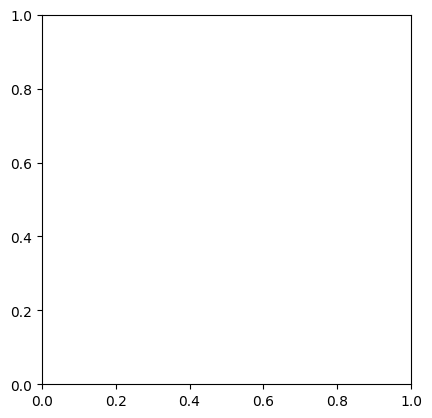

In [129]:
plt.imshow(sample_CT_arr.transpose(1,2,0))